In [0]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
x=df.iloc[:,1:]

In [0]:
y=df['total_bill']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [0]:
numeric_preprocessor = Pipeline(
 steps=[
 ("imputation_mean", SimpleImputer(missing_values=np.nan,
strategy="mean")),
 ("scaler", StandardScaler()),
 ]
)


In [0]:
from sklearn import set_config
set_config(display='diagram')
numeric_preprocessor

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaler', StandardScaler())])

In [0]:
categorical_preprocessor = Pipeline(
 steps=[
 (
 "imputation_constant",
 SimpleImputer(fill_value="missing", strategy="constant"),
 ),
 ("onehot", OneHotEncoder(handle_unknown="ignore")),
 ]
)


In [0]:
preprocessor=Pipeline(
 steps=[("categorical",categorical_preprocessor),
("numerical",numeric_preprocessor)]
)

In [0]:
preprocessor

Pipeline(steps=[('categorical',
                 Pipeline(steps=[('imputation_constant',
                                  SimpleImputer(fill_value='missing',
                                                strategy='constant')),
                                 ('onehot',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('numerical',
                 Pipeline(steps=[('imputation_mean', SimpleImputer()),
                                 ('scaler', StandardScaler())]))])

In [0]:
pipe=Pipeline(
 [("preprocessor",preprocessor),
("regressor",RandomForestRegressor())]
)


In [0]:
pipe

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('categorical',
                                  Pipeline(steps=[('imputation_constant',
                                                   SimpleImputer(fill_value='missing',
                                                                 strategy='constant')),
                                                  ('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))])),
                                 ('numerical',
                                  Pipeline(steps=[('imputation_mean',
                                                   SimpleImputer()),
                                                  ('scaler',
                                                   StandardScaler())]))])),
                ('regressor', RandomForestRegressor())])

In [0]:
from sklearn.compose import ColumnTransformer

categorical_cols = x.select_dtypes(include='object').columns.tolist()
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_preprocessor, categorical_cols),
        ("numerical", numeric_preprocessor, numerical_cols),
    ]
)

pipe = Pipeline(
    [("preprocessor", preprocessor), ("regressor", RandomForestRegressor())]
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tip', 'size'])])),
                ('regressor', RandomForestRegressor())])

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 

In [0]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [0]:
df = sns.load_dataset('tips')

In [0]:
X = df.drop('total_bill', axis=1) 
y = df['total_bill'] > df['total_bill'].median() 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
categorical_cols = X.select_dtypes(include='object').columns.tolist() 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [0]:
numeric_preprocessor = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]) 

In [0]:
categorical_preprocessor = Pipeline([ ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('encoder', OneHotEncoder(handle_unknown='ignore')) ])

In [0]:
preprocessor = ColumnTransformer([ ('num', numeric_preprocessor, numerical_cols), ('cat', categorical_preprocessor, categorical_cols) ])

In [0]:
models = {'Decision Tree': DecisionTreeClassifier(), 
           'Random Forest': RandomForestClassifier(), 
    'Logistic Regression': LogisticRegression(max_iter=200) 
} 

In [0]:
results = {} 

In [0]:
for name, model in models.items(): 
    print(f"\nTraining Model: {name}") 


Training Model: Decision Tree

Training Model: Random Forest

Training Model: Logistic Regression


In [0]:
 pipe = Pipeline(steps=[ 
        ('preprocessor', preprocessor), 
        ('classifier', model) 
    ])

In [0]:
pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tip', 'size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=200))])

In [0]:
train_pred = pipe.predict(X_train) 
test_pred = pipe.predict(X_test)

In [0]:
train_acc = accuracy_score(y_train, train_pred)

In [0]:
test_acc = accuracy_score(y_test, test_pred)

In [0]:
results[name] = { 
        'model': pipe, 
        'train_accuracy': train_acc, 
        'test_accuracy': test_acc, 
        'train_predictions': train_pred, 
        'test_predictions': test_pred, 
        'confusion_matrix': confusion_matrix(y_test, test_pred), 
        'classification_report': classification_report(y_test, test_pred) 
    }

In [0]:
print("\nMODEL PERFORMANCE SUMMARY:") 
for name, info in results.items(): 
    print(f"\n=== {name} ===") 
    print(f"Training Accuracy: {info['train_accuracy']:.4f}") 
    print(f"Testing Accuracy: {info['test_accuracy']:.4f}") 
    print("Confusion Matrix (Test):") 
    print(info['confusion_matrix']) 
    print("Classification Report (Test):") 
    print(info['classification_report']) 


MODEL PERFORMANCE SUMMARY:

=== Logistic Regression ===
Training Accuracy: 0.7487
Testing Accuracy: 0.7755
Confusion Matrix (Test):
[[23  3]
 [ 8 15]]
Classification Report (Test):
              precision    recall  f1-score   support

       False       0.74      0.88      0.81        26
        True       0.83      0.65      0.73        23

    accuracy                           0.78        49
   macro avg       0.79      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49



In [0]:
best_model = max(results.items(), key=lambda x: x[1]['test_accuracy']) 
print(f"\nBest Model: {best_model[0]} with Test Accuracy: {best_model[1]['test_accuracy']:.2f}")


Best Model: Logistic Regression with Test Accuracy: 0.78


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [0]:
randomcv_models = [
    (
        'Random Forest',
        Pipeline([
            ('preprocessor', preprocessor),  # your column transformer
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__bootstrap': [True, False]
        }
    ),
    (
        'Logistic Regression',
        Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(max_iter=200, random_state=42))
        ]),
        {
            'classifier__penalty': ['l2'],
            'classifier__C': [0.01, 0.1, 1.0, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    )
]


In [0]:
model_param = {}

for name, model, params in randomcv_models:
    print(f"\nTuning: {name}")
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    print(f"Best Params for {name}:")
    print(random.best_params_)



Tuning: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params for Random Forest:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None, 'classifier__bootstrap': True}

Tuning: Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/databricks/python/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params for Logistic Regression:
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 1.0}


In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def plot_lift_curve(y_true, y_proba, model_name):
    df = pd.DataFrame({'y_true': y_true, 'y_score': y_proba})
    df = df.sort_values('y_score', ascending=False).reset_index(drop=True)
    df['cum_response'] = df['y_true'].cumsum()
    df['lift'] = df['cum_response'] / (np.arange(1, len(df) + 1))
    
    baseline = df['y_true'].sum() / len(df)
    lift = df['lift'] / baseline

    plt.plot(np.arange(len(df)) / len(df), lift, label=model_name)
    plt.xlabel('Proportion of Sample')
    plt.ylabel('Lift')
    plt.title('Lift Curve (LOC)')
    plt.grid(True)


In [0]:
def evaluate_models_roc_loc(models, model_param, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(14, 5))

    
    plt.subplot(1, 2, 1)
    for name, model, _ in models:
        best_model = model.set_params(**model_param[name])
        best_model.fit(X_train, y_train)

        y_proba = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        print(f'AUC Score for {name}: {auc:.3f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)

   
    plt.subplot(1, 2, 2)
    for name, model, _ in models:
        best_model = model.set_params(**model_param[name])
        best_model.fit(X_train, y_train)

        y_proba = best_model.predict_proba(X_test)[:, 1]
        plot_lift_curve(y_test, y_proba, model_name=name)

    plt.legend()
    plt.tight_layout()
    plt.show()


AUC Score for Random Forest: 0.779
AUC Score for Logistic Regression: 0.884


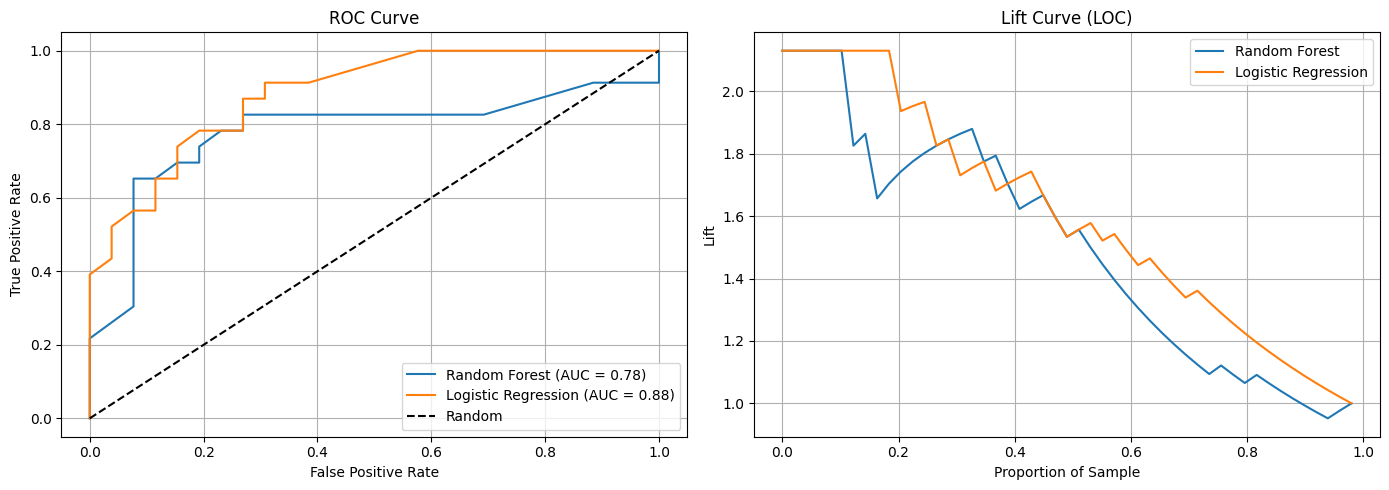

In [0]:
evaluate_models_roc_loc(randomcv_models, model_param, X_train, y_train, X_test, y_test)